# Robustness via curvature regularization, and vice versa
This notebooks demonstrates how to use the CURE algorithm for training a robust network.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
from CURE.CURE import CURELearner
import matplotlib.pyplot as plt
from utils.utils import read_vision_dataset
from utils.resnet import ResNet18

**Read the DataLoader**

In [3]:
trainloader, testloader = read_vision_dataset('./data', batch_size=256, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


**Import the network**

In [4]:
network = ResNet18()

**Initialize the class**

In [5]:
net_CURE = CURELearner(network, trainloader, testloader, lambda_=4, device='cuda')

**Set the optimizer**

In [6]:
net_CURE.set_optimizer(optim_alg='Adam', args={'lr':8e-4,  'weight_decay': 0.0},
                       scheduler='MultiStepLR', args_scheduler={'milestones':[7, 14], 'gamma':0.1})

**Import the pre-trained model**

In [7]:
net_CURE.import_model('./models/resnet_18_pretrained.pth')

**Train the model**

In [ ]:
h = np.linspace(0.1, 3.0, 5)
net_CURE.train(epochs=20, h=h)


Epoch: 0


** Plot the results**

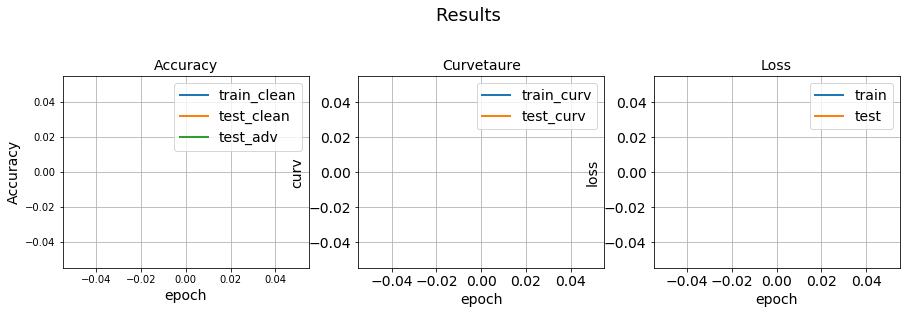

In [12]:
net_CURE.plot_results()

In [13]:
net_CURE.test(51,3.0, num_pgd_steps=30)

epoch = 51, adv_acc = 36.03515625, clean_acc = 80.87, loss = 0.6024027287960052 curvature = 0.0
Saving the best model to ./checkpoint
Saving...


(0.6024027287960052, 3.69, 80.87, 0.0)

In [2]:
!pip install --upgrade torch

    100% |████████████████████████████████| 804.1MB 43kB/s  eta 0:00:01 0% |▎                               | 6.7MB 39.9MB/s eta 0:00:21    6% |██                              | 51.4MB 44.4MB/s eta 0:00:17    9% |███▏                            | 80.4MB 54.0MB/s eta 0:00:14    14% |████▋                           | 115.8MB 53.4MB/s eta 0:00:13    19% |██████▏                         | 154.3MB 26.4MB/s eta 0:00:25    20% |██████▌                         | 162.7MB 36.3MB/s eta 0:00:18    21% |██████▉                         | 170.6MB 41.7MB/s eta 0:00:16    23% |███████▌                        | 189.7MB 39.5MB/s eta 0:00:16    23% |███████▋                        | 191.7MB 43.6MB/s eta 0:00:15    24% |███████▊                        | 193.7MB 33.8MB/s eta 0:00:19    25% |████████▏                       | 205.7MB 28.4MB/s eta 0:00:22    28% |█████████                       | 227.9MB 17.0MB/s eta 0:00:34    35% |███████████▏                    | 281.6MB 48.2MB/s eta 0:00:11    53% |███████

In [4]:
import torch
torch.__version__

'1.8.1+cu102'